In [3]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

In [4]:
def get_links(title):
    url = f"https://en.wikipedia.org/w/api.php?action=query&titles={title}&prop=links&pllimit=max&format=json"
    response = requests.get(url)
    data = response.json()
    page = next(iter(data['query']['pages'].values()))
    return [link['title'] for link in page.get('links', [])]

In [7]:
def is_cs_related(title):
    url = f"https://en.wikipedia.org/w/api.php?action=query&titles={title}&prop=categories&format=json"
    response = requests.get(url)
    data = response.json()
    page = next(iter(data['query']['pages'].values()))
    categories = [cat['title'] for cat in page.get('categories', [])]
    return any('Computer science' in cat for cat in categories)

In [9]:
def build_graph(start_title, max_depth=2, max_nodes=1000):
    G = nx.DiGraph()
    visited = set()
    queue = deque([(start_title, 0)])
    
    while queue and len(G) < max_nodes:
        title, depth = queue.popleft()
        if title in visited or depth > max_depth:
            continue
        
        visited.add(title)
        if is_cs_related(title):
            links = get_links(title)
            G.add_node(title)
            for link in links:
                G.add_edge(title, link)
                if link not in visited:
                    queue.append((link, depth + 1))
        
        time.sleep(1)  # To avoid hitting API rate limits
    
    return G

In [11]:
def analyze_network(G):
    pagerank = nx.pagerank(G)
    top_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
    return top_nodes

In [13]:
def visualize_network(G, top_nodes):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_size=10, node_color='lightblue', with_labels=False)
    
    top_node_set = set(node for node, _ in top_nodes)
    nx.draw_networkx_nodes(G, pos, nodelist=top_node_set, node_color='red', node_size=50)
    nx.draw_networkx_labels(G, pos, {node: node for node, _ in top_nodes}, font_size=8)
    
    plt.title("Wikipedia Computer Science Network")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("cs_network.png", dpi=300, bbox_inches='tight')
    plt.show()

Building network...
Analyzing network...
Top 5 most important Computer Science topics:
1. 2D computer graphics: 0.0020
2. ACM Computing Classification System: 0.0020
3. Abacus: 0.0020
4. Abstraction (computer science): 0.0020
5. Ada Lovelace: 0.0020
Visualizing network...


/var/folders/1f/36fkwl990z50jv4440fmb0h00000gn/T/ipykernel_85681/494296505.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


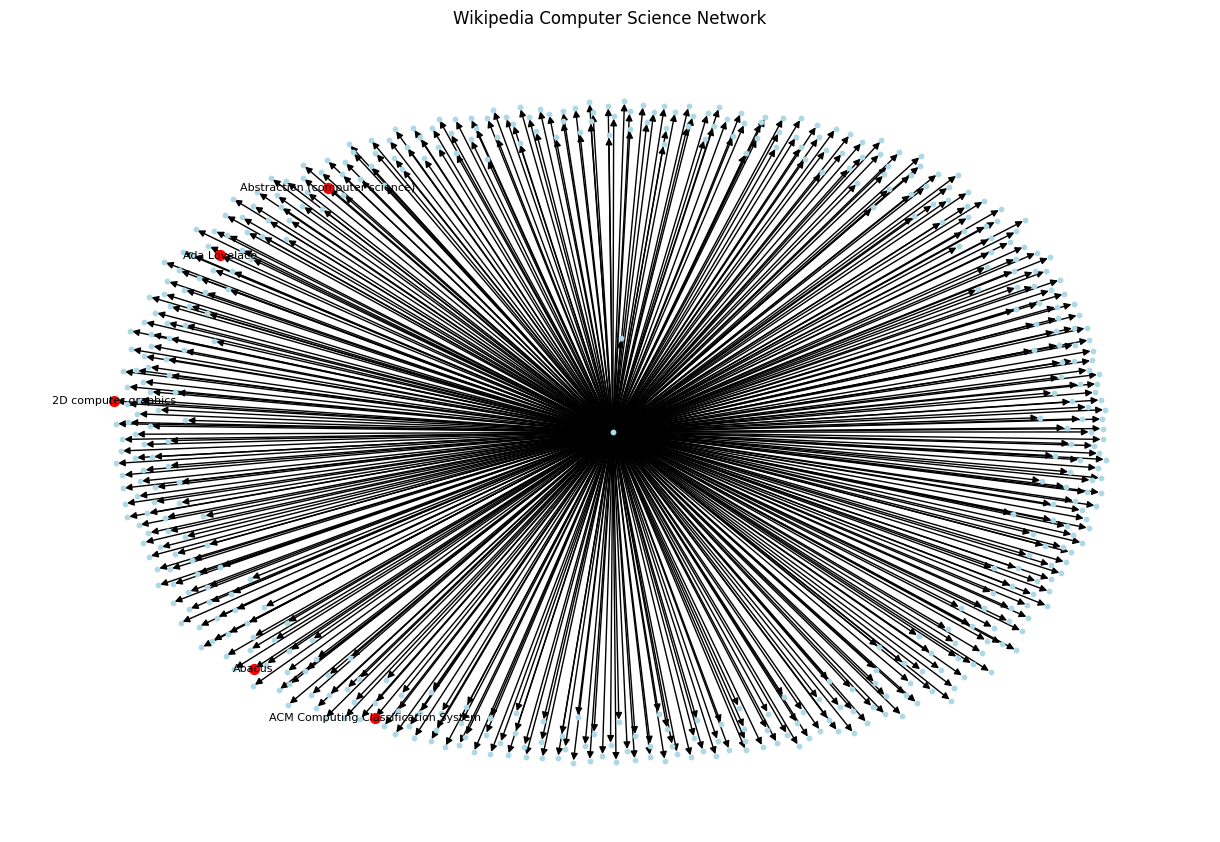

In [15]:
def main():
    print("Building network...")
    G = build_graph("Computer_science", max_depth=1, max_nodes=200)
    
    print("Analyzing network...")
    top_nodes = analyze_network(G)
    
    print("Top 5 most important Computer Science topics:")
    for i, (node, score) in enumerate(top_nodes, 1):
        print(f"{i}. {node}: {score:.4f}")
    
    print("Visualizing network...")
    visualize_network(G, top_nodes)

if __name__ == "__main__":
    main()